In [3]:
import os
import nibabel as nib
import numpy as np
from skimage.transform import resize

# Fixed dimensions for resizing
IMG_HEIGHT = 128
IMG_WIDTH = 128
IMG_DEPTH = 20  # Fixed number of slices

# Paths
train_dir = r"D:\1\Mohsin\ACDC\database\training"
test_dir = r"D:\1\Mohsin\ACDC\database\testing"

def resize_image(image, target_shape):
    """Resize a 3D image to the target shape."""
    return resize(image, target_shape, mode='constant', preserve_range=True)

def load_data(data_dir):
    images = []
    masks = []
    for patient in os.listdir(data_dir):
        patient_path = os.path.join(data_dir, patient)
        if not os.path.isdir(patient_path):
            continue
        # Load images and ground truth masks
        for file in os.listdir(patient_path):
            if "_frame01.nii.gz" in file and "gt" not in file:
                image_path = os.path.join(patient_path, file)
                mask_path = image_path.replace("_frame01.nii.gz", "_frame01_gt.nii.gz")
                # Load image and mask
                image = nib.load(image_path).get_fdata()
                mask = nib.load(mask_path).get_fdata()
                
                # Resize to fixed dimensions
                resized_image = resize_image(image, (IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH))
                resized_mask = resize_image(mask, (IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH))
                
                images.append(resized_image)
                masks.append(resized_mask)
    return np.array(images), np.array(masks)

# Load training data
train_images, train_masks = load_data(train_dir)
print(f"Loaded {len(train_images)} training samples with shape {train_images[0].shape}")


Loaded 100 training samples with shape (128, 128, 20)


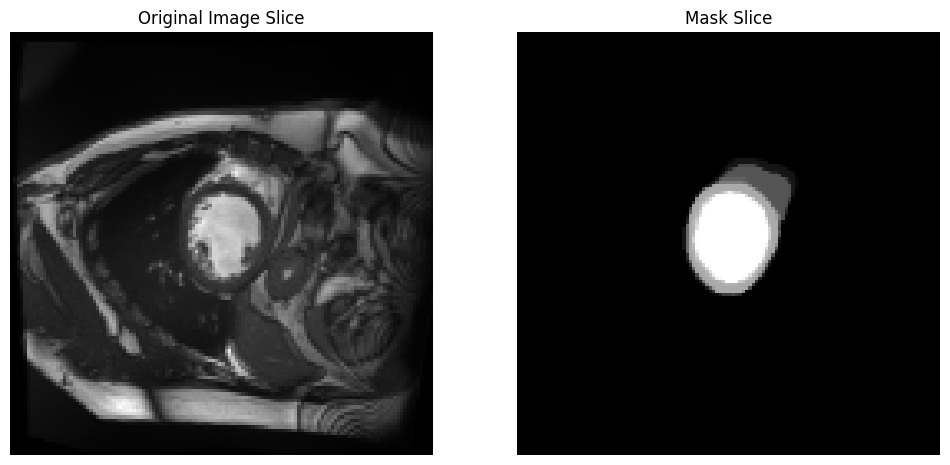

In [4]:
import matplotlib.pyplot as plt

def plot_image_and_mask(image, mask, slice_idx=10):
    """Plot the original image and its corresponding mask for a given slice."""
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot the original image slice
    ax[0].imshow(image[:, :, slice_idx], cmap='gray')
    ax[0].set_title("Original Image Slice")
    ax[0].axis('off')  # Turn off axis
    
    # Plot the mask slice
    ax[1].imshow(mask[:, :, slice_idx], cmap='gray')
    ax[1].set_title("Mask Slice")
    ax[1].axis('off')  # Turn off axis
    
    plt.show()

# Visualize the first image and mask from the training set
plot_image_and_mask(train_images[0], train_masks[0])


In [5]:
import nibabel as nib
import numpy as np
from skimage.transform import resize
import os

# Paths to dataset
train_dir = r"D:\1\Mohsin\ACDC\database\training"

# Function to resize and ensure consistency in depth
def load_and_preprocess_data(data_dir, target_size=(256, 256, 20)):
    images = []
    masks = []
    for patient in os.listdir(data_dir):
        patient_path = os.path.join(data_dir, patient)
        if not os.path.isdir(patient_path):
            continue
        # Load images and masks
        for file in os.listdir(patient_path):
            if "_frame01.nii.gz" in file and "gt" not in file:
                image_path = os.path.join(patient_path, file)
                mask_path = image_path.replace("_frame01.nii.gz", "_frame01_gt.nii.gz")
                image = nib.load(image_path).get_fdata()
                mask = nib.load(mask_path).get_fdata()
                
                # Resize images and masks to the target size
                resized_image = resize(image, (target_size[0], target_size[1], target_size[2]), mode='constant', preserve_range=True)
                resized_mask = resize(mask, (target_size[0], target_size[1], target_size[2]), mode='constant', preserve_range=True)
                
                # Normalize images
                resized_image = resized_image / np.max(resized_image)
                
                images.append(resized_image)
                masks.append(resized_mask)
    
    # Convert lists to numpy arrays and return
    return np.array(images), np.array(masks)

# Define target size (256x256 with depth 20)
train_images, train_masks = load_and_preprocess_data(train_dir, target_size=(256, 256, 20))

print(f"Loaded {len(train_images)} training samples with shape {train_images[0].shape}")


Loaded 100 training samples with shape (256, 256, 20)


In [6]:
import albumentations as A
import numpy as np
import nibabel as nib
from skimage.transform import resize
import os

# Paths to dataset
train_dir = r"D:\1\Mohsin\ACDC\database\training"

# Define target size for resizing
target_size = (256, 256, 20)

# Define augmentation pipeline
augmentation = A.Compose([
    A.RandomRotate90(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

# Function to load and preprocess data
def load_and_preprocess_data(data_dir, target_size=(256, 256, 20)):
    images = []
    masks = []
    
    for patient in os.listdir(data_dir):
        patient_path = os.path.join(data_dir, patient)
        if not os.path.isdir(patient_path):
            continue
            
        # Load images and masks
        for file in os.listdir(patient_path):
            if "_frame01.nii.gz" in file and "gt" not in file:
                image_path = os.path.join(patient_path, file)
                mask_path = image_path.replace("_frame01.nii.gz", "_frame01_gt.nii.gz")
                image = nib.load(image_path).get_fdata()
                mask = nib.load(mask_path).get_fdata()
                
                # Resize images and masks
                resized_image = resize(image, (target_size[0], target_size[1], target_size[2]), mode='constant', preserve_range=True)
                resized_mask = resize(mask, (target_size[0], target_size[1], target_size[2]), mode='constant', preserve_range=True)
                
                # Normalize images
                resized_image = resized_image / np.max(resized_image)
                
                # Apply augmentation
                augmented = augmentation(image=resized_image, mask=resized_mask)
                augmented_image = augmented['image']
                augmented_mask = augmented['mask']
                
                images.append(augmented_image)
                masks.append(augmented_mask)
    
    return np.array(images), np.array(masks)

# Load and preprocess data
train_images, train_masks = load_and_preprocess_data(train_dir, target_size=target_size)

print(f"Loaded {len(train_images)} training samples with shape {train_images[0].shape}")


d:\1\alpha\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\1\alpha\lib\site-packages\albumentations\__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.22). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Loaded 100 training samples with shape (256, 256, 20)


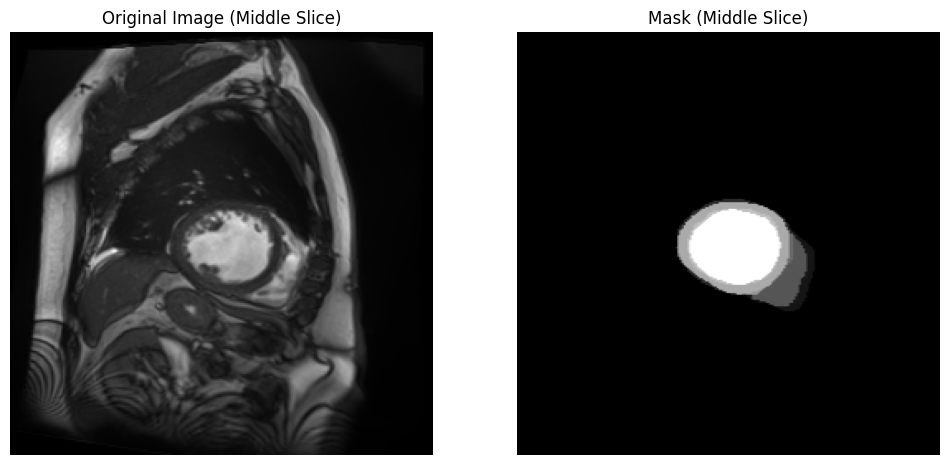

In [9]:
import matplotlib.pyplot as plt

# Function to plot image and mask
def plot_image_and_mask(image, mask):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the original image
    axes[0].imshow(image[:, :, image.shape[2] // 2], cmap='gray')
    axes[0].set_title("Original Image (Middle Slice)")
    axes[0].axis('off')

    # Plot the corresponding mask
    axes[1].imshow(mask[:, :, mask.shape[2] // 2], cmap='gray')
    axes[1].set_title("Mask (Middle Slice)")
    axes[1].axis('off')

    plt.show()

# Plot a sample (first image and mask from the dataset)
plot_image_and_mask(train_images[0], train_masks[0])


In [10]:
import torch
import nibabel as nib
import numpy as np
import os
from skimage.transform import resize
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class ACDCDataset(Dataset):
    def __init__(self, data_dir, target_size=(256, 256, 20), transform=None):
        self.data_dir = data_dir
        self.target_size = target_size
        self.transform = transform
        self.patients = os.listdir(data_dir)
    
    def __len__(self):
        return len(self.patients)
    
    def __getitem__(self, idx):
        patient = self.patients[idx]
        patient_path = os.path.join(self.data_dir, patient)
        
        # Load MRI image and segmentation mask
        for file in os.listdir(patient_path):
            if "_frame01.nii.gz" in file and "gt" not in file:
                image_path = os.path.join(patient_path, file)
                mask_path = image_path.replace("_frame01.nii.gz", "_frame01_gt.nii.gz")
                
                # Load the image and mask
                image = nib.load(image_path).get_fdata()
                mask = nib.load(mask_path).get_fdata()
                
                # Resize
                resized_image = resize(image, (self.target_size[0], self.target_size[1], self.target_size[2]), mode='constant', preserve_range=True)
                resized_mask = resize(mask, (self.target_size[0], self.target_size[1], self.target_size[2]), mode='constant', preserve_range=True)
                
                # Normalize
                resized_image = resized_image / np.max(resized_image)
                
                # Apply transformation if available
                if self.transform:
                    augmented = self.transform(image=resized_image, mask=resized_mask)
                    resized_image = augmented['image']
                    resized_mask = augmented['mask']
                
                return torch.tensor(resized_image, dtype=torch.float32).unsqueeze(0), torch.tensor(resized_mask, dtype=torch.float32).unsqueeze(0)
        
# Example transform (augmentations can be added as needed)
transform = transforms.Compose([transforms.RandomHorizontalFlip(), transforms.RandomVerticalFlip()])
dataset = ACDCDataset(data_dir=r"D:\1\Mohsin\ACDC\database\training", transform=transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)


In [11]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets (70%, 20%, 10%)
train_images, val_images, train_masks, val_masks = train_test_split(
    train_images, train_masks, test_size=0.3, random_state=42
)

val_images, test_images, val_masks, test_masks = train_test_split(
    val_images, val_masks, test_size=0.33, random_state=42
)

print(f"Training samples: {len(train_images)}, Validation samples: {len(val_images)}, Test samples: {len(test_images)}")


Training samples: 70, Validation samples: 20, Test samples: 10


In [12]:
import torch
import torch.nn as nn

# Define the UNet model architecture
class UNet(nn.Module):
    def __init__(self, in_channels=1, out_channels=4):
        super(UNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv3d(in_channels, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv3d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool3d(2)
        )
        self.decoder = nn.Sequential(
            nn.Conv3d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv3d(64, out_channels, kernel_size=3, padding=1),
            nn.Softmax(dim=1)
        )
    
    def forward(self, x):
        x1 = self.encoder(x)
        x = self.decoder(x1)
        return x

# Instantiate the model
model = UNet(in_channels=1, out_channels=4)  # 4 channels for background, LV, RV, and MYO
print(model)


UNet(
  (encoder): Sequential(
    (0): Conv3d(1, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): ReLU(inplace=True)
    (2): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): ReLU(inplace=True)
    (2): Conv3d(64, 4, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (3): Softmax(dim=1)
  )
)


In [13]:
import torch
from torch.utils.data import DataLoader, Dataset
import numpy as np

class CardiacDataset(Dataset):
    def __init__(self, images, masks, transform=None):
        self.images = images
        self.masks = masks
        self.transform = transform
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        image = self.images[idx]
        mask = self.masks[idx]
        
        # Apply any transformations (e.g., augmentation) if provided
        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']
        
        # Convert to torch tensors
        image = torch.tensor(image, dtype=torch.float32).unsqueeze(0)  # Add channel dimension
        mask = torch.tensor(mask, dtype=torch.long)  # Use long for segmentation masks
        
        return image, mask

# Create Dataset and DataLoader for training and validation
train_dataset = CardiacDataset(train_images, train_masks, transform=augmentation)
val_dataset = CardiacDataset(val_images, val_masks)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)


In [ ]:
import torch.optim as optim
import torch.nn.functional as F

# Define Dice Loss function
def dice_loss(pred, target):
    smooth = 1e-6
    intersection = torch.sum(pred * target)
    return 1 - (2 * intersection + smooth) / (torch.sum(pred) + torch.sum(target) + smooth)

# Instantiate the model and optimizer
model = UNet(in_channels=1, out_channels=4)  # 4 channels for background, LV, RV, and MYO
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Number of epochs
epochs = 5

# Training loop
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, masks in train_loader:
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        
        # Calculate the loss
        loss = dice_loss(outputs, masks)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")


RuntimeError: [enforce fail at alloc_cpu.cpp:114] data. DefaultCPUAllocator: not enough memory: you tried to allocate 2684354560 bytes.

In [17]:
from sklearn.metrics import jaccard_score

# Evaluation function
def evaluate_model(model, val_loader):
    model.eval()
    dice_scores = []
    iou_scores = []
    
    with torch.no_grad():
        for images, masks in val_loader:
            outputs = model(images)
            # Convert outputs to predicted labels (highest probability)
            preds = torch.argmax(outputs, dim=1)
            
            # Compute Dice Score for each class
            for i in range(1, 4):  # for LV, RV, MYO (ignore background class)
                dice = dice_loss(preds == i, masks == i).item()
                dice_scores.append(dice)
            
            # Compute IoU for each class
            for i in range(1, 4):
                iou = jaccard_score(masks.numpy().flatten(), preds.numpy().flatten(), average='macro')
                iou_scores.append(iou)
    
    return np.mean(dice_scores), np.mean(iou_scores)

# Call the evaluation function after training
dice_score, iou_score = evaluate_model(model, val_loader)
print(f"Validation Dice Score: {dice_score}, Validation IoU Score: {iou_score}")


RuntimeError: [enforce fail at alloc_cpu.cpp:114] data. DefaultCPUAllocator: not enough memory: you tried to allocate 2684354560 bytes.

In [ ]:
import matplotlib.pyplot as plt

# Visualize the predictions on a sample image
def visualize_predictions(image, mask, pred_mask):
    fig, axes = plt.subplots(1, 3, figsize=(12, 6))
    
    axes[0].imshow(image[0, :, :, image.shape[3] // 2], cmap='gray')
    axes[0].set_title("Original Image (Middle Slice)")
    axes[0].axis('off')
    
    axes[1].imshow(mask[0, :, :, mask.shape[3] // 2], cmap='gray')
    axes[1].set_title("Ground Truth (Middle Slice)")
    axes[1].axis('off')
    
    axes[2].imshow(pred_mask[0, :, :, pred_mask.shape[3] // 2], cmap='gray')
    axes[2].set_title("Predicted Mask (Middle Slice)")
    axes[2].axis('off')
    
    plt.show()

# Visualize a sample
image, mask = next(iter(val_loader))
pred_mask = model(image)
visualize_predictions(image, mask, pred_mask)
